
Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.


## Carregando os dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
serie_temporal = pd.read_csv('/content/dataset.csv')

In [3]:
serie_temporal.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


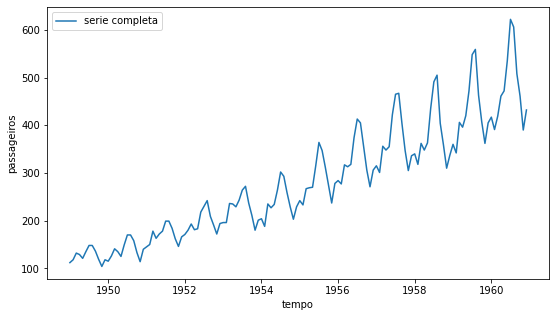

In [4]:
mpl.rcParams['figure.figsize'] = (9, 5)
sns.lineplot(x='tempo',y='passageiros', data=serie_temporal,label='serie completa') 

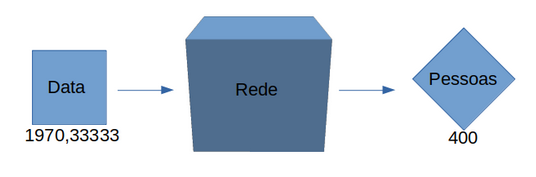

## Como colocar isto em uma rede neural?

In [5]:
sc = StandardScaler() #Padronizar escala
sc.fit(serie_temporal)
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

StandardScaler()

In [6]:
escalonamento = sc.transform(serie_temporal)
#colunas 0 e 1
x=escalonamento[:,0] 
y=escalonamento[:,1] 

Text(0.5, 0, 'Data')

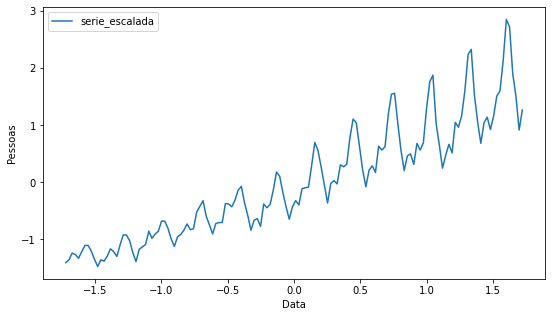

In [7]:
#plotar dados com novas escalas
sns.lineplot(x=x,y=y,label='serie_escalada') 
plt.ylabel('Pessoas')
plt.xlabel('Data')

## Treino e teste

In [8]:
treino = int(len(serie_temporal)*0.9) 
teste = len(serie_temporal)-treino 

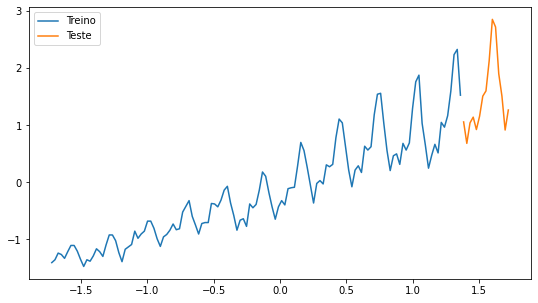

In [9]:
x_treino = x[0:treino]
y_treino = y[0:treino]
x_teste = x[treino:len(serie_temporal)]
y_teste = y[treino:len(serie_temporal)]
sns.lineplot(x=x_treino,y=y_treino,label='Treino') 
sns.lineplot(x=x_teste,y=y_teste,label='Teste')

###Queremos prever a região laranja!

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
regressao = Sequential()
#Uma única entrada ligando a um neurônio
#Dimensão da entrada
#Inicializando todos os pesos com números 1
#Ativação linear
regressao.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear',use_bias=True))
#Erro médio quadrático
#Otimizador
regressao.compile(loss='mean_squared_error',optimizer='adam')
regressao.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
regressao.fit(x_treino,y_treino) 

5/5 [==============================] - 0s 2ms/step - loss: 0.1286


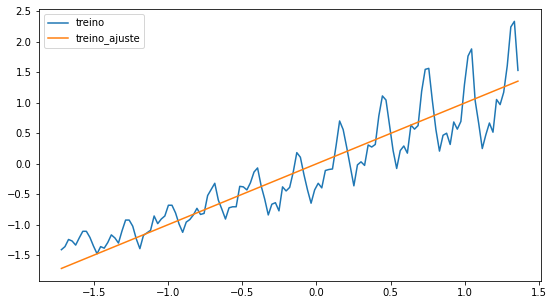

In [13]:
y_predicao= regressao.predict(x_treino) 
#Prever os dados de treino
sns.lineplot(x=x_treino,y=y_treino,label='treino')
sns.lineplot(x=x_treino,y=y_predicao[:,0],label='treino_ajuste') 

In [14]:
regressao = Sequential()
#Uma única entrada ligando a um neurônio
#Dimensão da entrada
#Inicializando todos os pesos com números 1
#Ativação linear
regressao.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear',use_bias=False))
#Erro médio quadrático
#Otimizador
regressao.compile(loss='mean_squared_error',optimizer='adam')
regressao.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [15]:
regressao.fit(x_treino,y_treino) 

5/5 [==============================] - 0s 4ms/step - loss: 0.1285


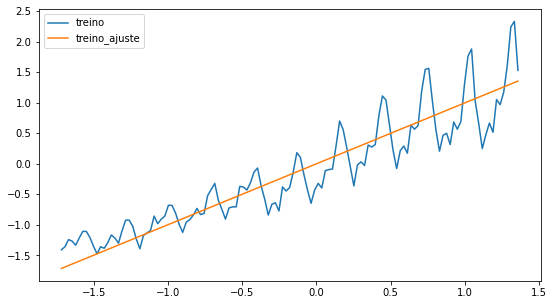

In [18]:
y_predicao= regressao.predict(x_treino)
#Prever os dados de treino com viés falso
sns.lineplot(x=x_treino,y=y_treino,label='treino')
sns.lineplot(x=x_treino,y=y_predicao[:,0],label='treino_ajuste') 

In [21]:
da = {'tempo': x_treino, 'passageiros': y_predicao[:,0]}
results = pd.DataFrame(data=da)

In [22]:
results

,tempo,passageiros
0,-1.720064,-1.712936
1,-1.696007,-1.688979
2,-1.671950,-1.665021
3,-1.647894,-1.641064
4,-1.623837,-1.617107
...,...,...
124,1.262984,1.257750
125,1.287041,1.281707
126,1.311098,1.305664
127,1.335155,1.329621


In [26]:
result_do_teste_t = sc.inverse_transform(results) #transformação inversa
result_do_teste_t = pd.DataFrame(result_do_teste_t)
result_do_teste_t.columns = ['tempo','passageiros']

In [27]:
result_do_teste_t

,tempo,passageiros
0,1949.000000,75.518792
1,1949.083333,78.382844
2,1949.166667,81.246896
3,1949.250000,84.110949
4,1949.333333,86.975015
...,...,...
124,1959.333333,430.661408
125,1959.416667,433.525475
126,1959.500000,436.389527
127,1959.583333,439.253565


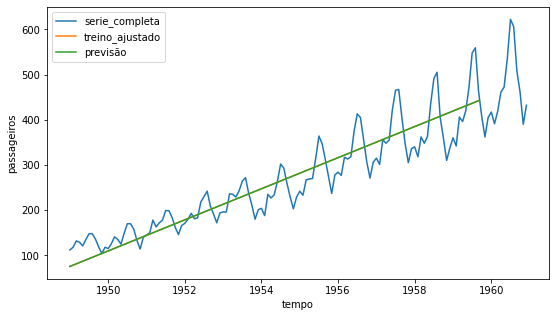

In [28]:
sns.lineplot(x="tempo",y="passageiros",data=serie_temporal,label='serie_completa')
sns.lineplot(x="tempo",y="passageiros",data=result_do_teste_t,label='treino_ajustado')
sns.lineplot(x="tempo",y="passageiros",data=result_do_teste_t,label='previsão')

In [30]:
y_predicao_t= regressao.predict(x_teste) #Prevendo o futuro
da1 = {'tempo': x_teste, 'passageiros': y_predicao_t[:,0]}
resultados_teste = pd.DataFrame(data=da1)

In [32]:
resultado_transf_t = sc.inverse_transform(resultados_teste)
resultado_transf_t = pd.DataFrame(resultado_transf_t)
resultado_transf_t.columns = ['tempo','passageiros']

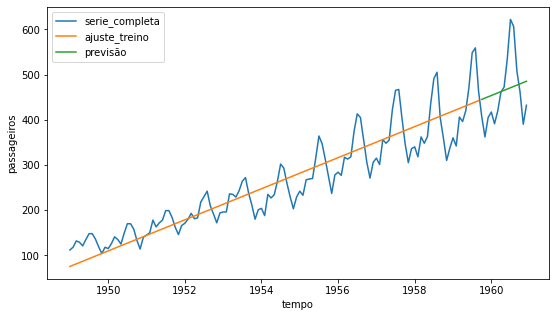

In [33]:
sns.lineplot(x="tempo",y="passageiros",data=serie_temporal,label='serie_completa')
sns.lineplot(x="tempo",y="passageiros",data=result_do_teste_t,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_t,label='previsão')

###Vamos realizar uma regressão não linear!

In [39]:
#Outra rede
regressao2 = Sequential()
regressao2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) 
regressao2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressao2.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressao2.compile(loss='mean_squared_error',optimizer='adam')
regressao2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 8         
                                                                 
 dense_9 (Dense)             (None, 8)                 64        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [40]:
regressao2.fit(x_treino,y_treino,epochs =500)

Epoch 1/500
5/5 [==============================] - 1s 3ms/step - loss: 0.7957
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7929
Epoch 3/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7899
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7880
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7868
Epoch 6/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7859
Epoch 7/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7847
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7838
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7826
Epoch 10/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7821
Epoch 11/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7813
Epoch 12/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7804
Epoch 13/500
5/5 [==============================] - 0s 3ms/s

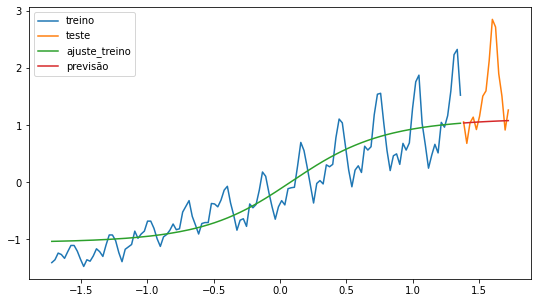

In [41]:
y_predic= regressao2.predict(x_treino) #Prevendo os dados de treino (o ajuste)
y_predic_teste= regressao2.predict(x_teste) #Prevendo os dados de teste(o futuro)
sns.lineplot(x=x_treino,y=y_treino,label='treino')
sns.lineplot(x=x_teste,y=y_teste,label='teste')
sns.lineplot(x=x_treino,y=y_predic[:,0],label='ajuste_treino')
sns.lineplot(x=x_teste,y=y_predic_teste[:,0],label='previsão')